<a href="https://colab.research.google.com/github/Aashrut/Machine-Learning/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [1]:
# Imports Required Libraries
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# load the Titanic dataset
df = pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Correlation \n Titanic Dataset')

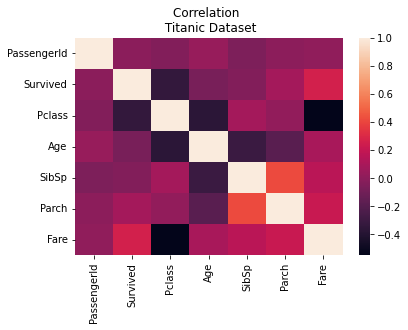

In [2]:
#Data Visualisation
plt.figure(1)
sns.heatmap(df.corr())
plt.title('Correlation \n Titanic Dataset')

In [3]:
df.drop(labels=['PassengerId','Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna("S", inplace=True)

encoder = LabelEncoder()
# Transform the Sex data and copy them back into the Sex fearure 
df["Sex"]=encoder.fit_transform(df["Sex"])
df["Embarked"] = encoder.fit_transform(df["Embarked"])

# Any value we want to reshape needs be turned into array first
ages_df = np.array(df["Age"]).reshape(-1, 1)
fares_df = np.array(df["Fare"]).reshape(-1, 1)

# Scaler  arrays
scaler = StandardScaler()

df["Age"] = scaler.fit_transform(ages_df)
df["Fare"] = scaler.fit_transform(fares_df)

# Split Titanic dataset into training/testing data
X = df.drop(labels=['Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
#Create decision tree, logic regression and Support Vector models
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 0)

lReg_clf = LogisticRegression()
sv_clf = SVC()

dtree = BaggingClassifier(base_estimator=dt_clf, n_estimators=50, random_state=12)
dtree_fit= dtree.fit(X_train, y_train)
dtree_test_pred = dtree.predict(X_test)


voting_clf = VotingClassifier(estimators=[('SVC', sv_clf), ('LogReg', lReg_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
voting_test_pred = voting_clf.predict(X_test)


Bagging performance on the testing dataset
accuracy score: 82.4627%

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       176
           1       0.79      0.66      0.72        92

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268


Confusion Matrix: 
 [[160  16]
 [ 31  61]]



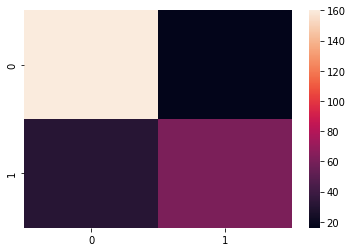

Test Result for Voting Model:
accuracy score: 81.7164%

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       176
           1       0.78      0.65      0.71        92

    accuracy                           0.82       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.82      0.81       268


Confusion Matrix: 
 [[159  17]
 [ 32  60]]



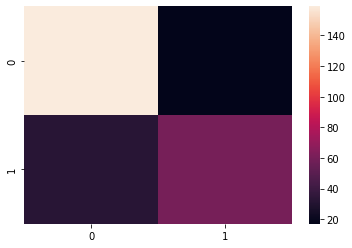

In [6]:
def print_score(st, y, y_pred):
        print(st)
        print("accuracy score: {0:.4f}%\n".format(accuracy_score(y, y_pred)*100))
        print("Classification Report: \n {}\n".format(classification_report(y, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y, y_pred)))
        sns.heatmap(pd.DataFrame(confusion_matrix(y,y_pred)))
        plt.show()
     

#print Bagging classifier model metrics results
print_score("Bagging performance on the testing dataset", y_test, dtree_test_pred)

#Print Voting algorithme metrics results
print_score("Voting performance on the testing dataset:", y_test, voting_test_pred)

Optimized Bagging Model Performance on the testing dataset:
accuracy score: 82.8358%

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       176
           1       0.80      0.66      0.73        92

    accuracy                           0.83       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.83      0.83      0.82       268


Confusion Matrix: 
 [[161  15]
 [ 31  61]]



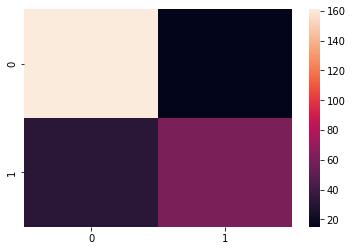

In [10]:
#Optimize Bagging Classifier Model
from sklearn.model_selection import GridSearchCV
params_grid = {'base_estimator__max_depth' : [1, 2, 3, 4, 5],
                'max_samples' : [0.05, 0.1, 0.2, 0.5]}
grid_search = GridSearchCV(dtree, params_grid,scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
optimal_Bagging_test_pred = grid_search.predict(X_test)
grid_search.best_estimator_.get_params()

#print the optimised Bagging classifier metrics results
print_score("Optimized Bagging Model Performance on the testing dataset:", y_test, optimal_Bagging_test_pred)

Optimized Voting Model Performance on the testing dataset:
accuracy score: 81.3433%

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       176
           1       0.78      0.63      0.70        92

    accuracy                           0.81       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.81      0.81      0.81       268


Confusion Matrix: 
 [[160  16]
 [ 34  58]]



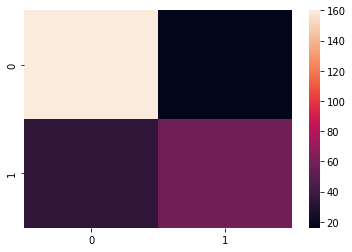

In [11]:
#Optimize voting algorithm Model
params = {'LogReg__C': [1.0, 100.0],
      'SVC__C': [2,3,4],}

grid = GridSearchCV(estimator=voting_clf, param_grid=params, cv=5)
grid.fit(X_train, y_train)
optimal_Voting_test_pred = grid.predict(X_test)
grid.best_estimator_.get_params()

#print the optimised voting model metrics results
print_score("Optimized Voting Model Performance on the testing dataset:", y_test, optimal_Voting_test_pred)